In [1]:
import pandas as pd
from datetime import datetime, timedelta

# Sample data
data = {
    'Date': [datetime.now() - timedelta(days=30*i) for i in range(4)],
    'Company': ['Company_A', 'Company_B', 'Company_A', 'Company_B'],
    'Revenue': [5000000, 6000000, 5200000, 6200000],
    'Net_Income': [500000, 600000, 520000, 610000],
    'Earnings_Per_Share': [2.5, 3.0, 2.6, 3.1],
    'Operating_Cash_Flow': [700000, 800000, 720000, 810000],
    'Gross_Margin': [40, 45, 42, 46],
    'Profit_Margin': [10, 12, 11, 13],
    'Total_Assets': [15000000, 16000000, 15200000, 16200000],
    'Total_Liabilities': [5000000, 6000000, 5100000, 6100000],
    'Debt_to_Equity_Ratio': [0.3, 0.35, 0.31, 0.34],
    'Market_Cap': [20000000, 22000000, 20500000, 22500000],
    'P_E_Ratio': [15, 18, 16, 19],
    'Dividend_Yield': [2.5, 3.0, 2.6, 3.1],
    'Sector': ['Technology', 'Healthcare', 'Technology', 'Healthcare'],
    'Economic_Indicator_1': [5.0, 4.5, 5.1, 4.6],
    'Economic_Indicator_2': [3.0, 3.2, 3.1, 3.3],
    'Target_Earnings': [520000, 610000, 530000, 620000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('corporate_earnings_prediction.csv', index=False)

print("CSV file created successfully.")


CSV file created successfully.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
# Load the dataset
df = pd.read_csv('corporate_earnings_prediction.csv', parse_dates=['Date'])


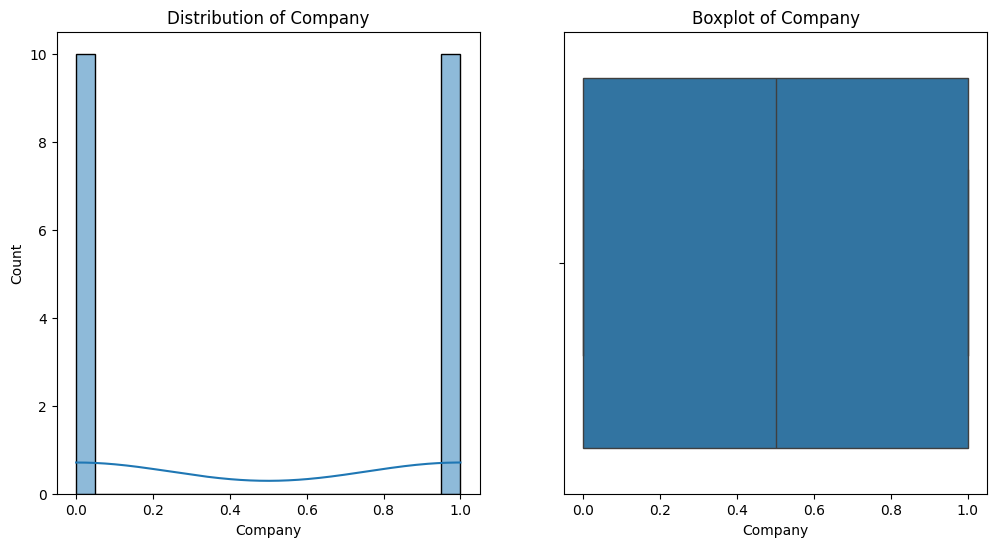

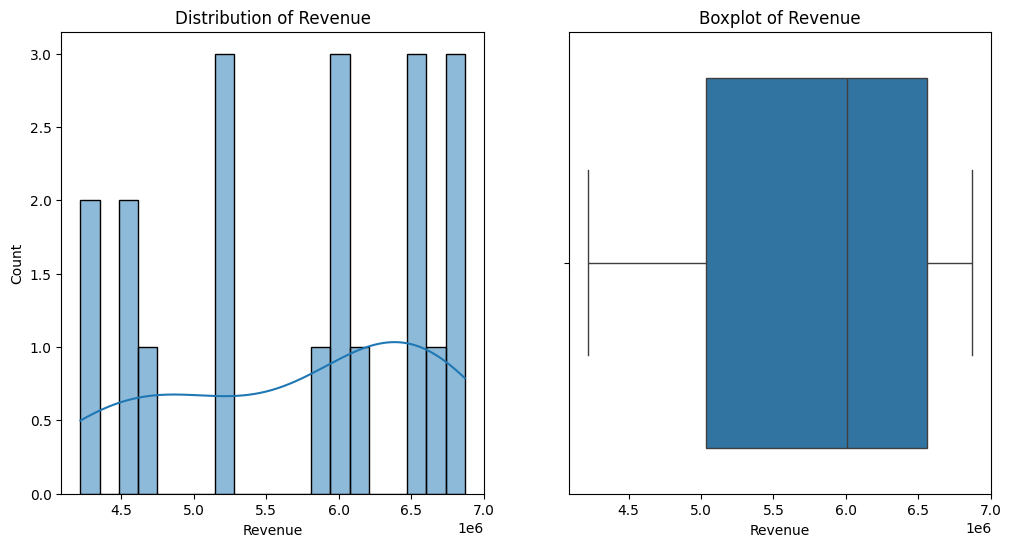

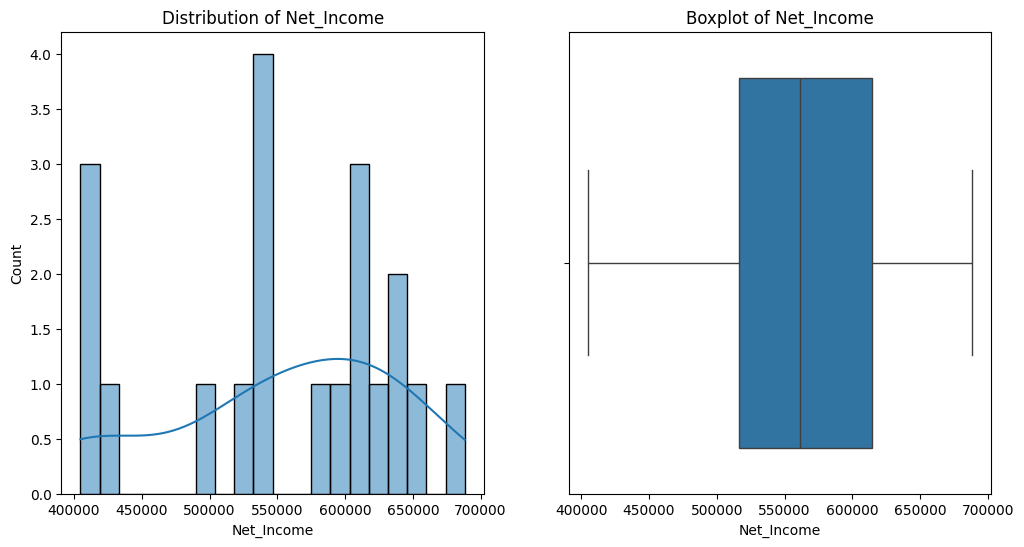

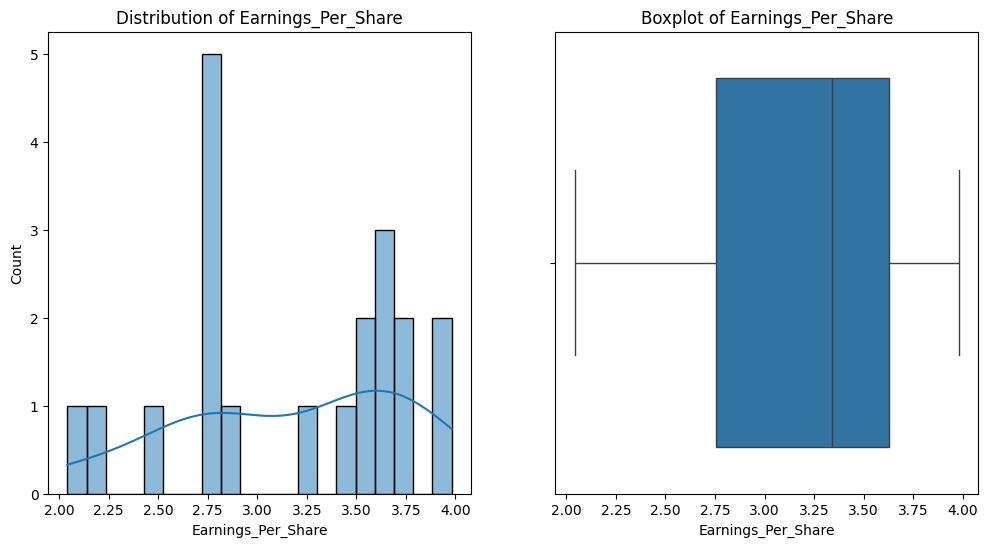

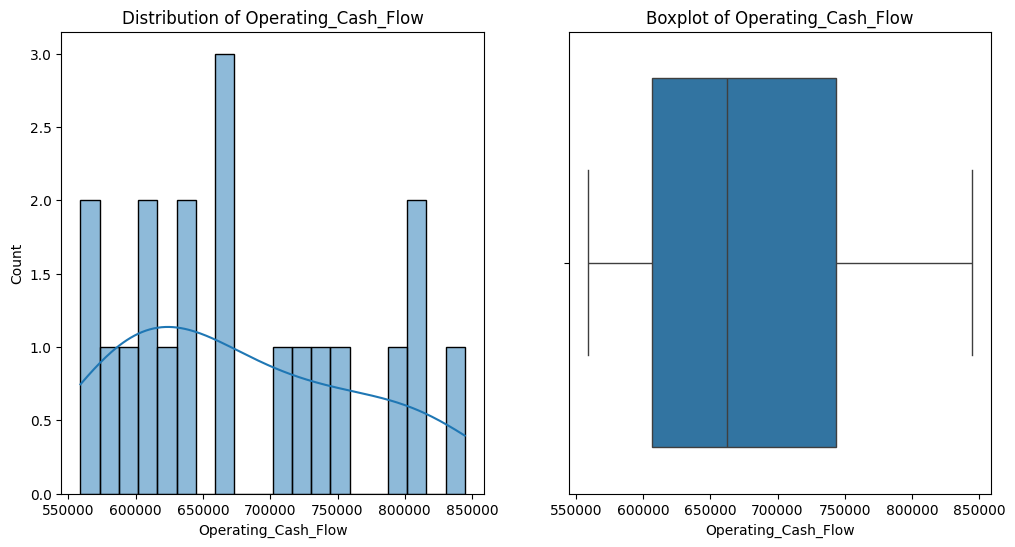

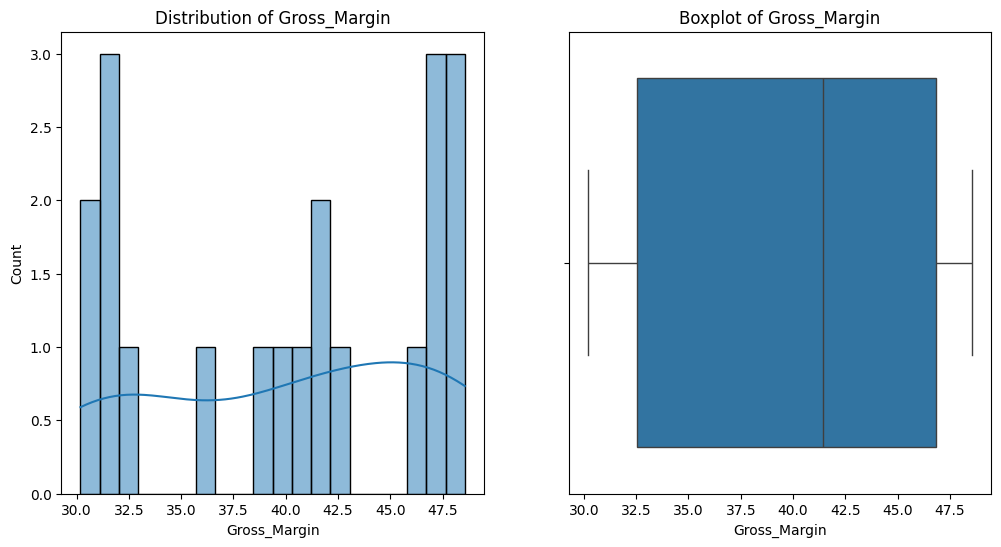

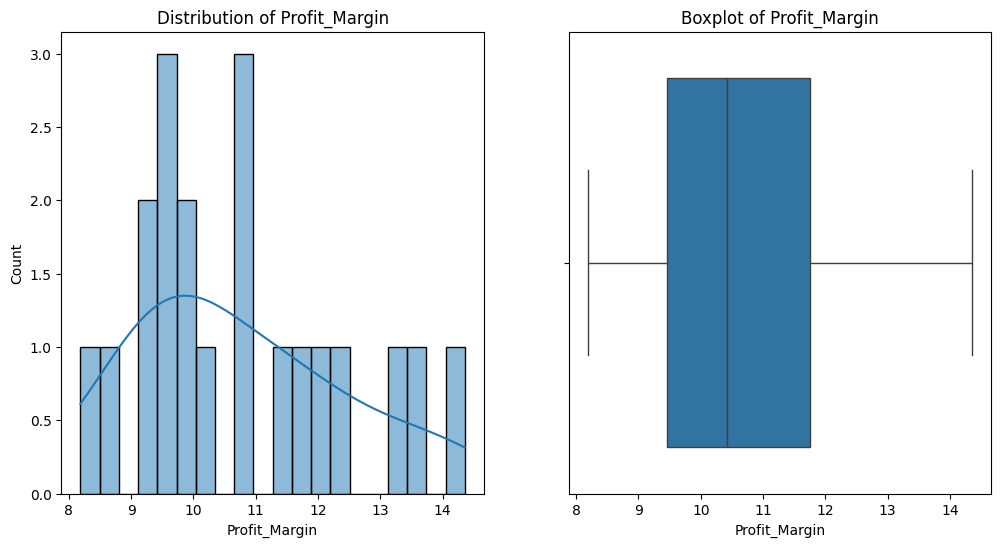

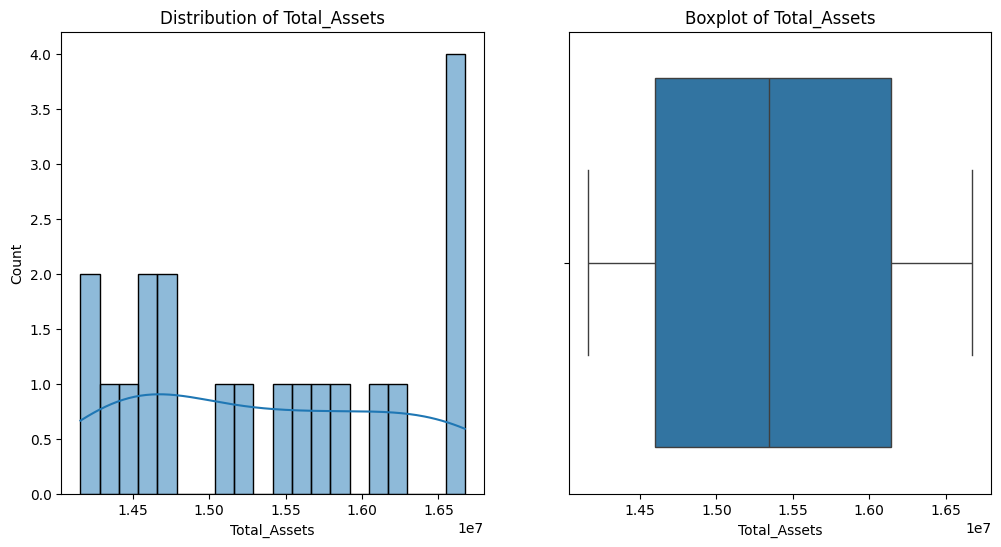

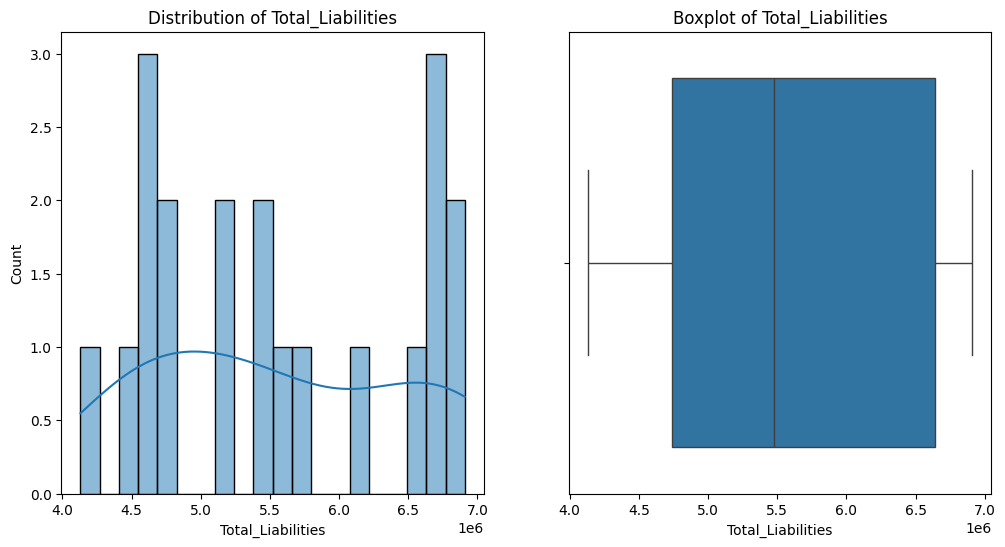

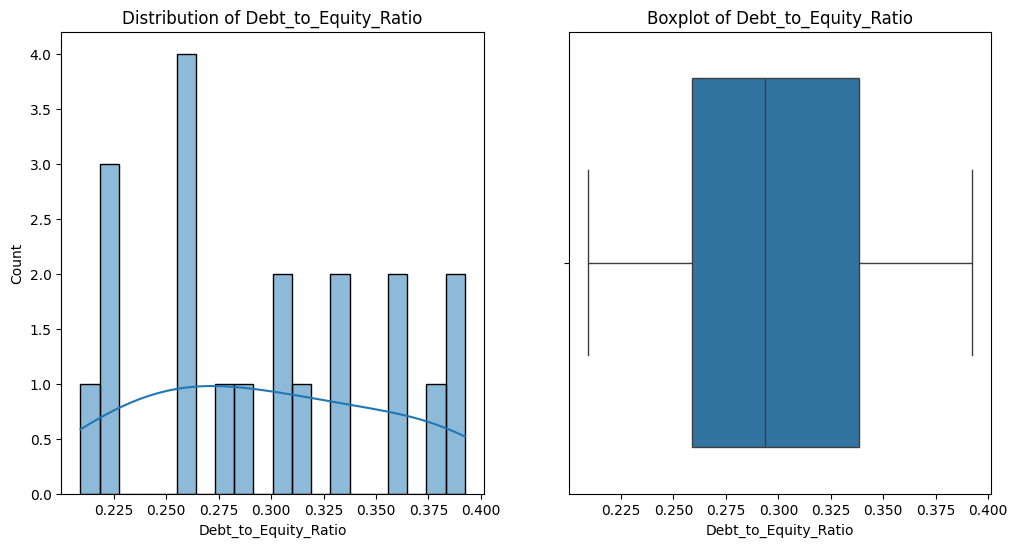

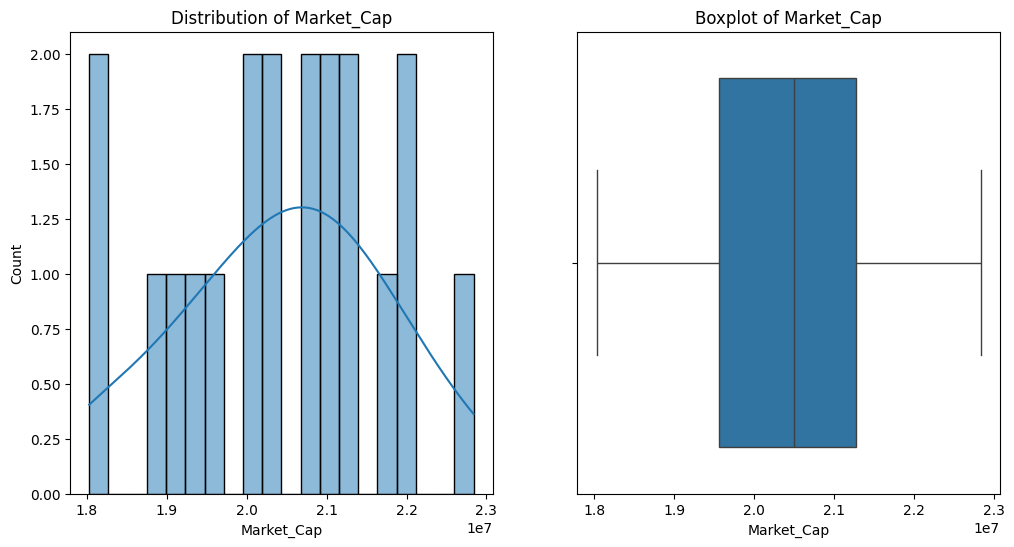

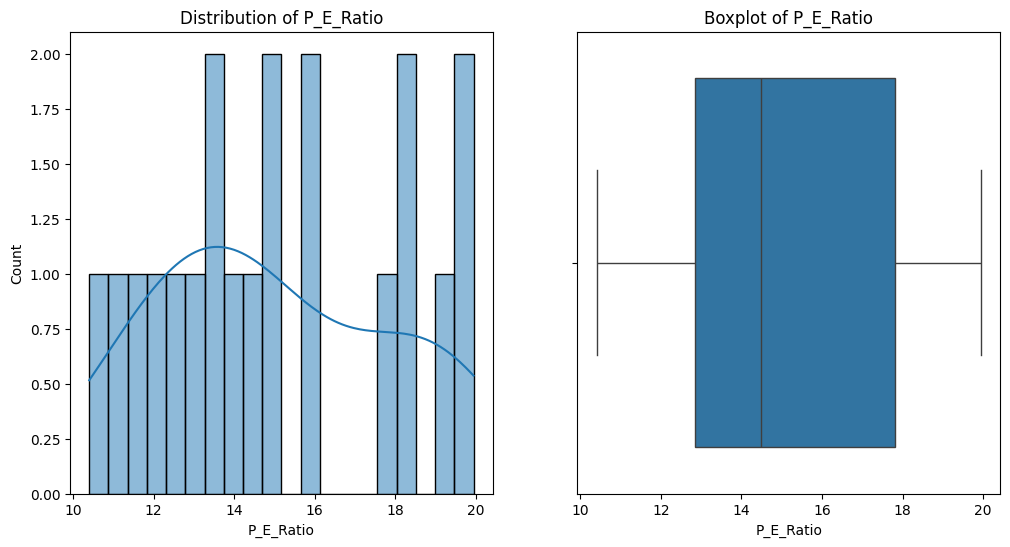

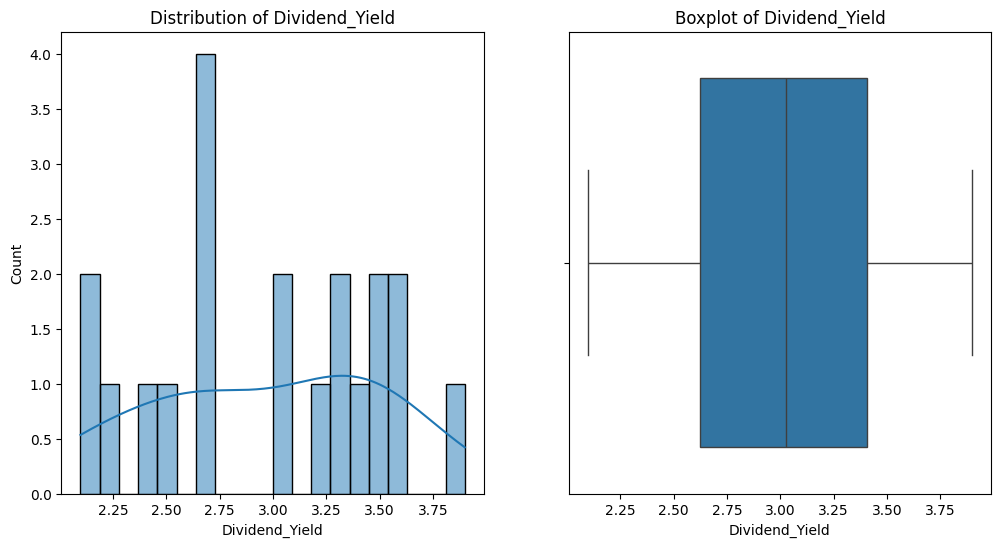

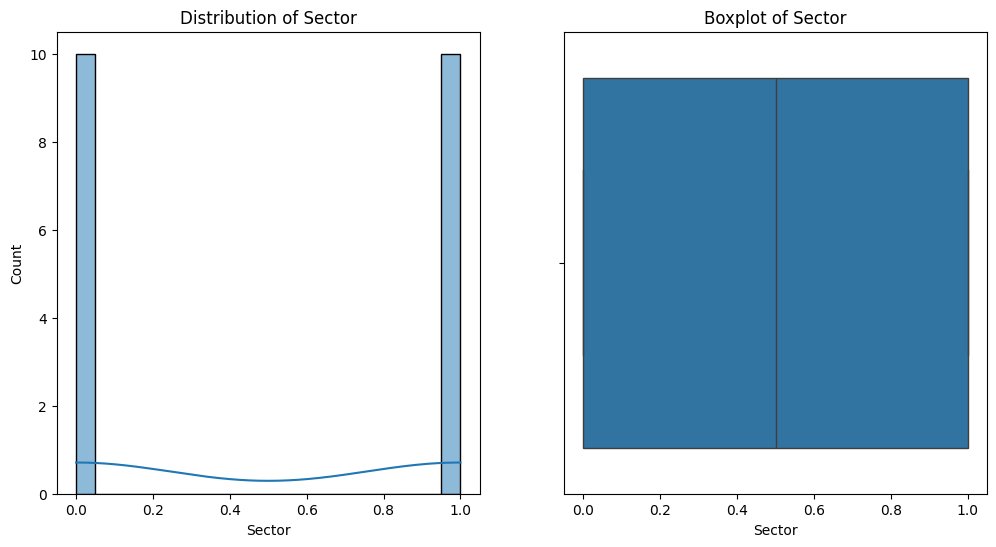

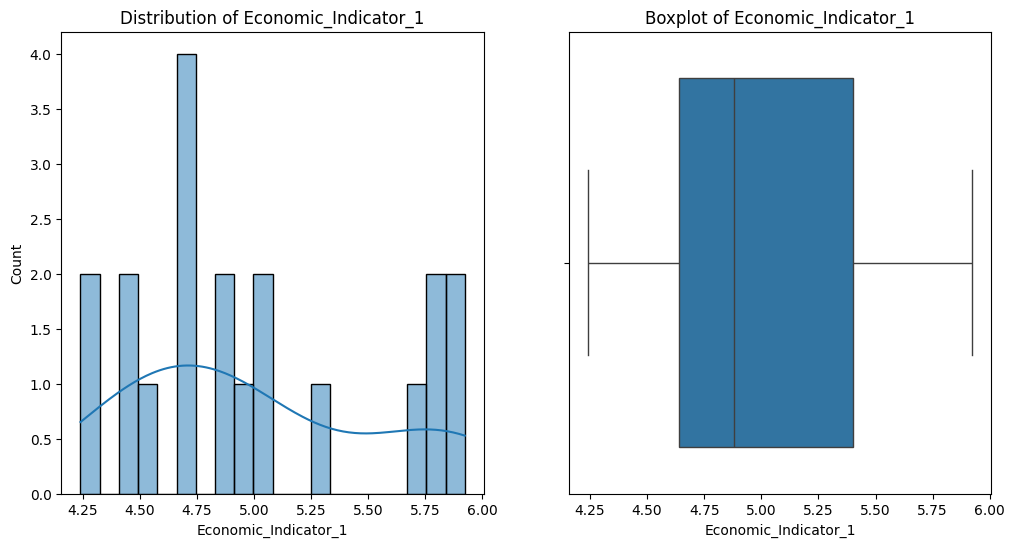

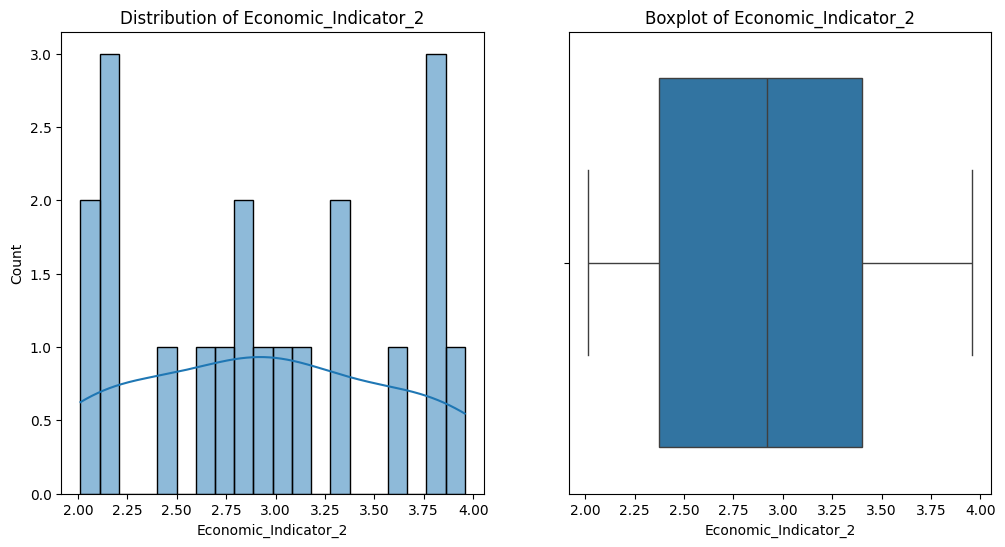

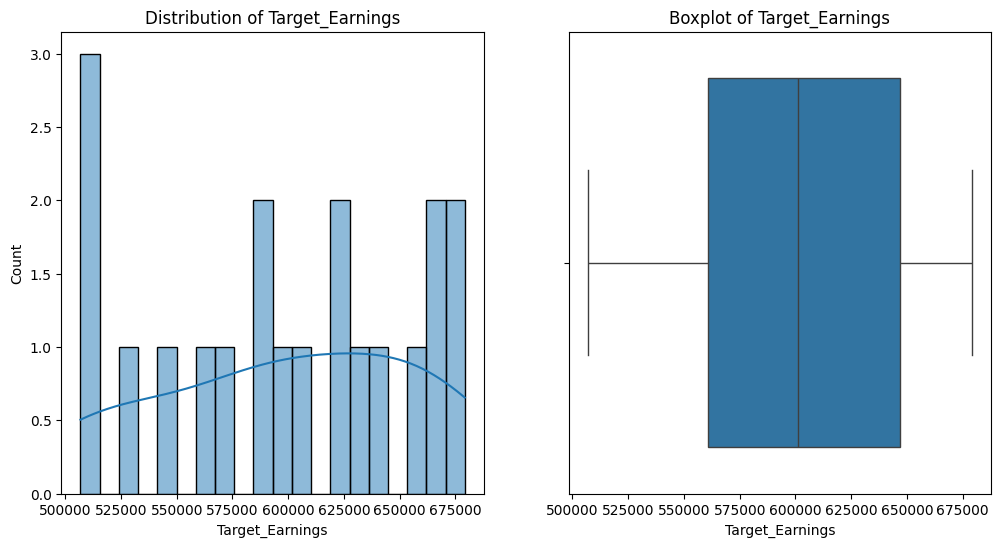

In [27]:
import seaborn as sns
numerical_features = df.select_dtypes(include=['float64', 'int64'])

for column in numerical_features.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


In [28]:
categorical_features = df.select_dtypes(include=['object'])

for column in categorical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column])
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=45)
    plt.show()


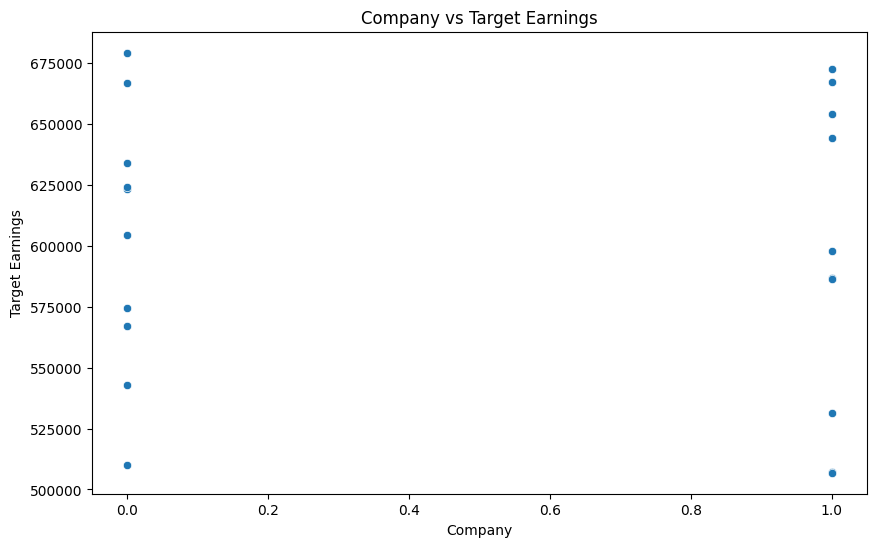

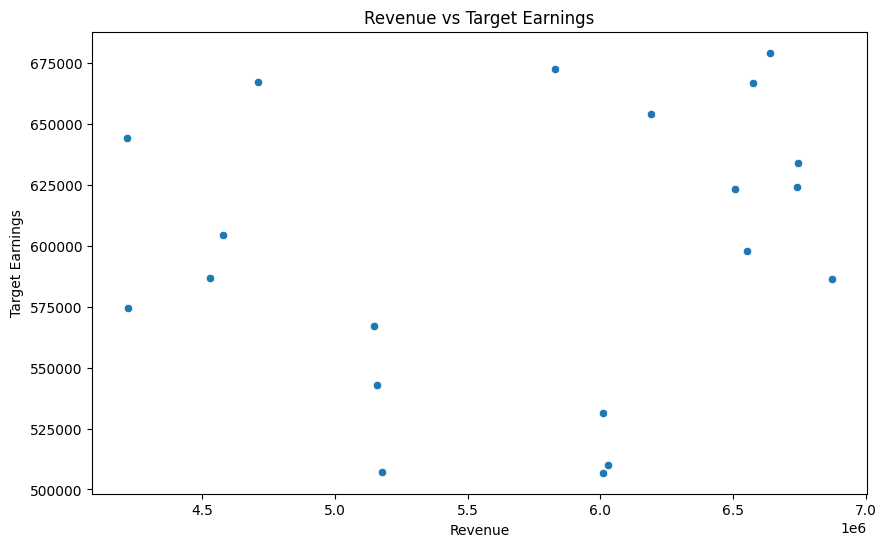

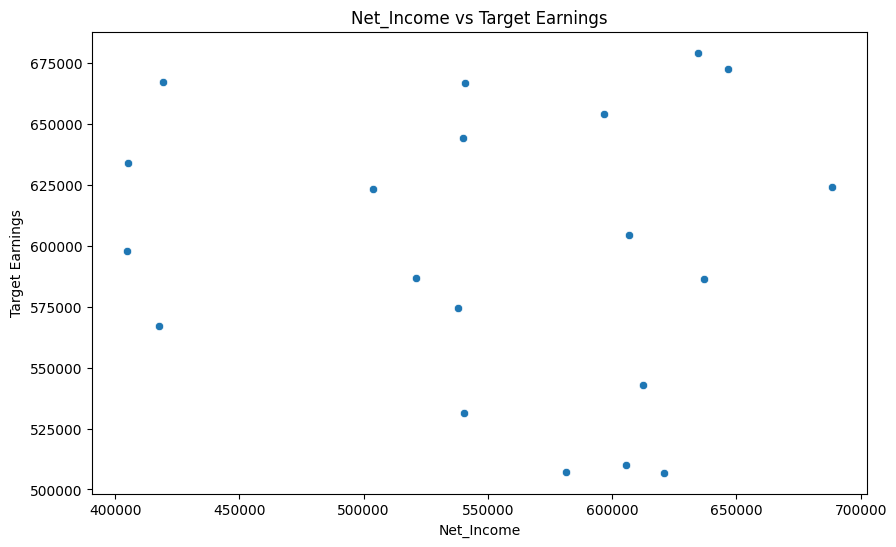

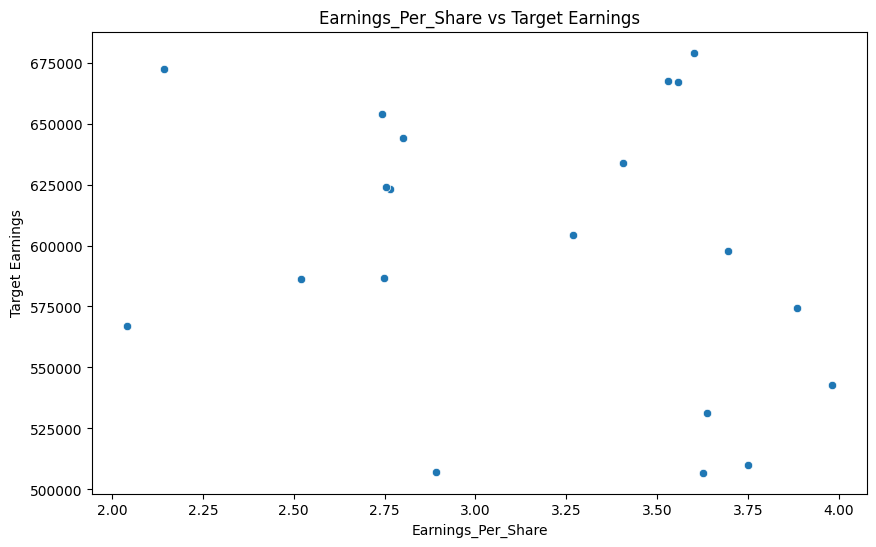

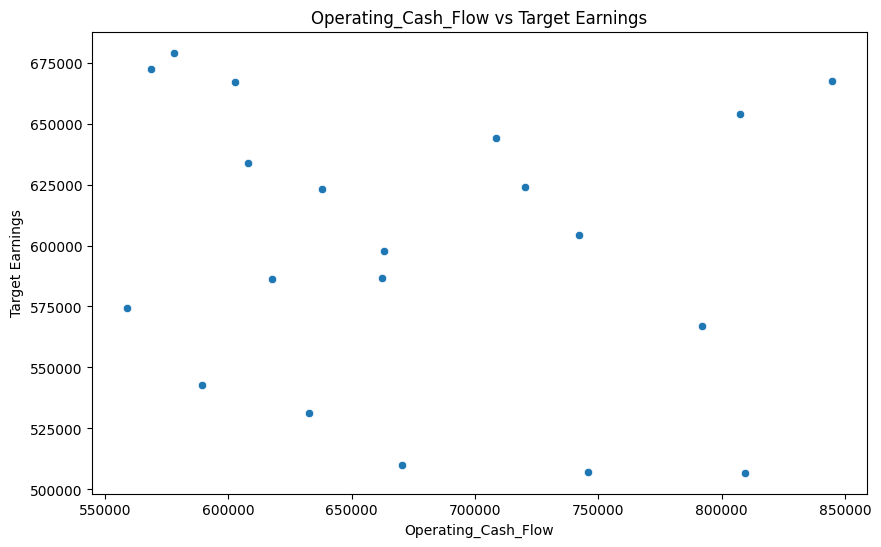

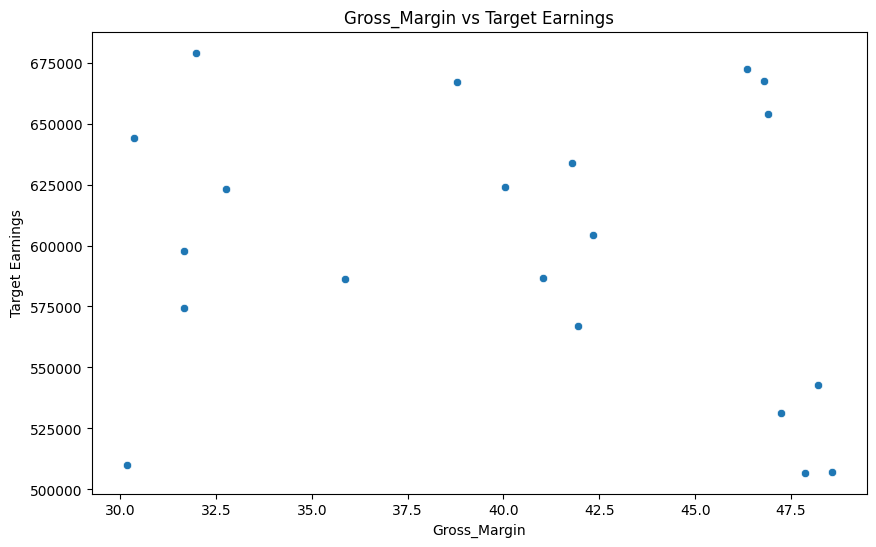

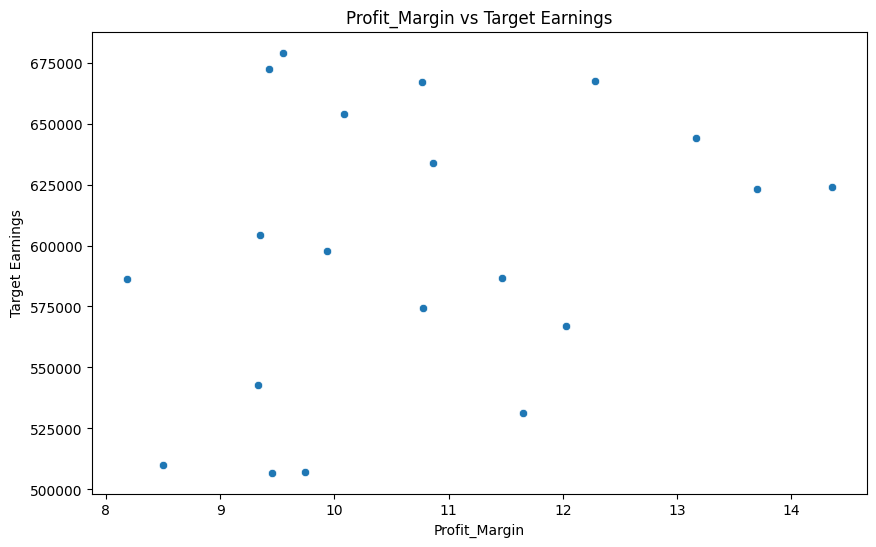

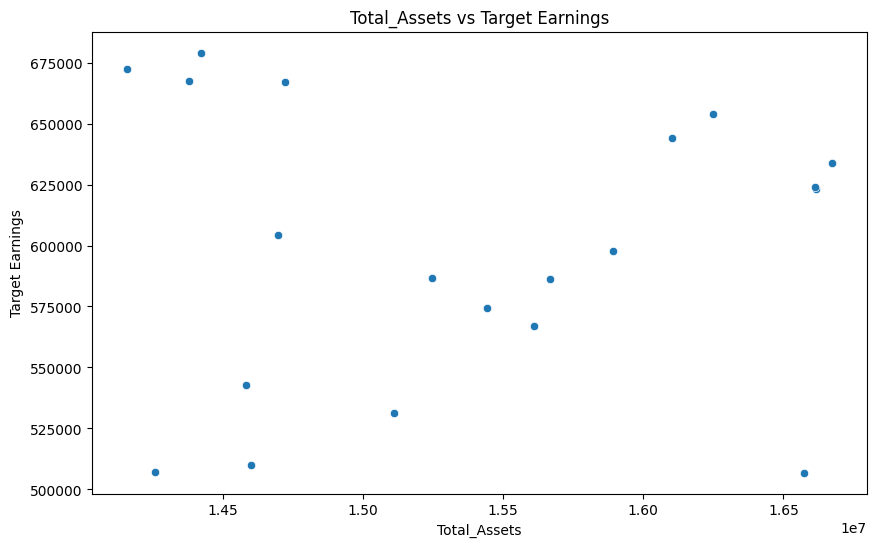

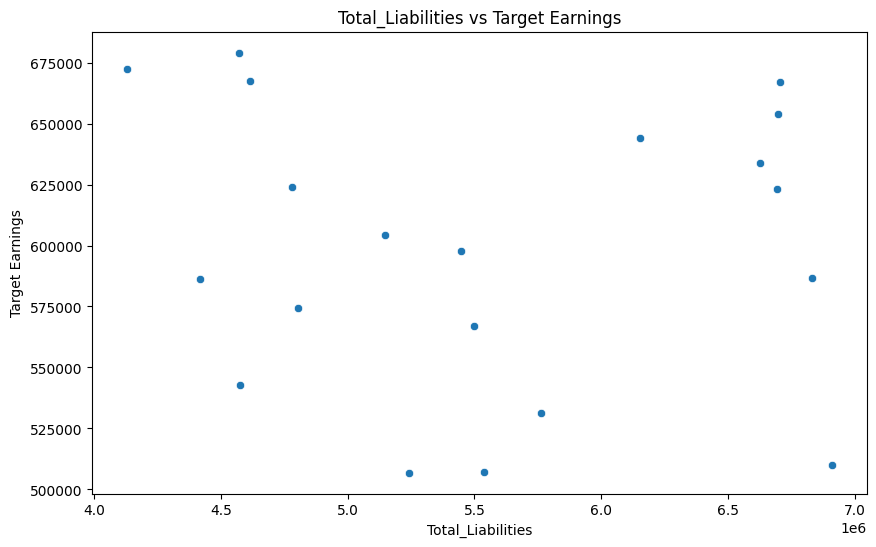

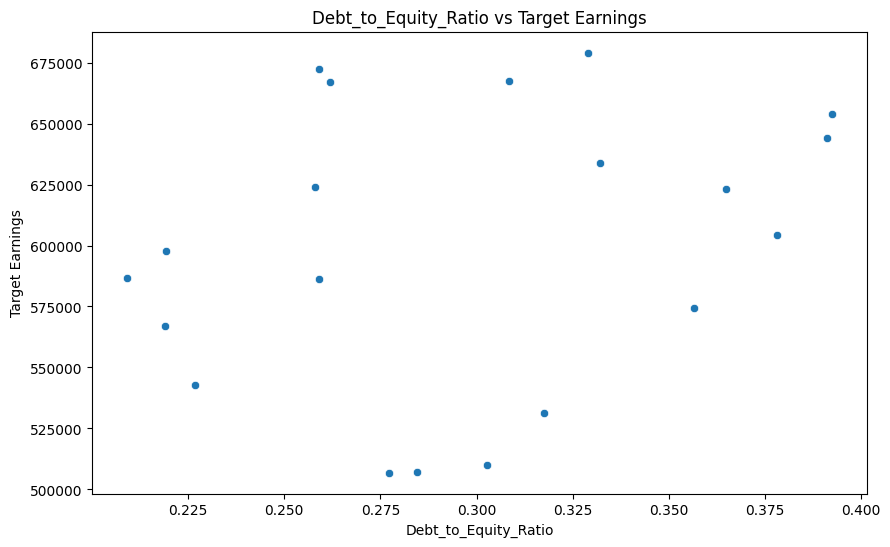

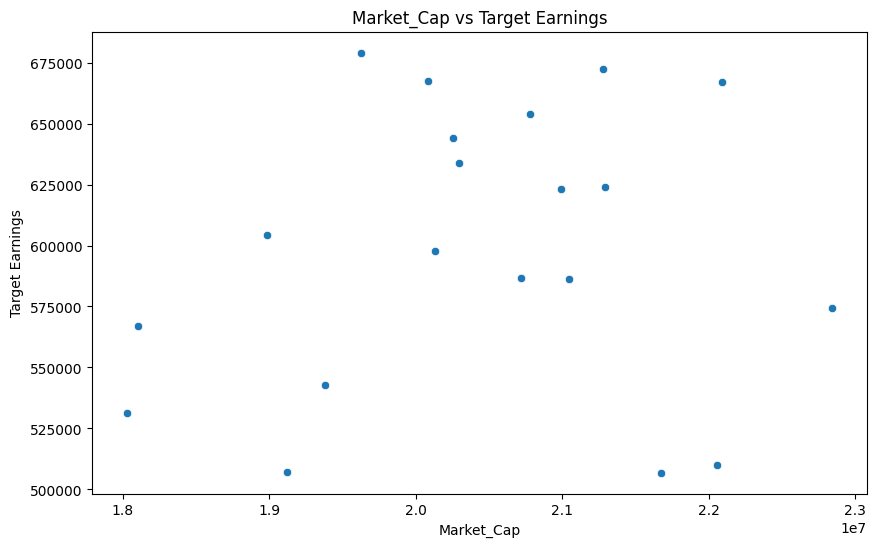

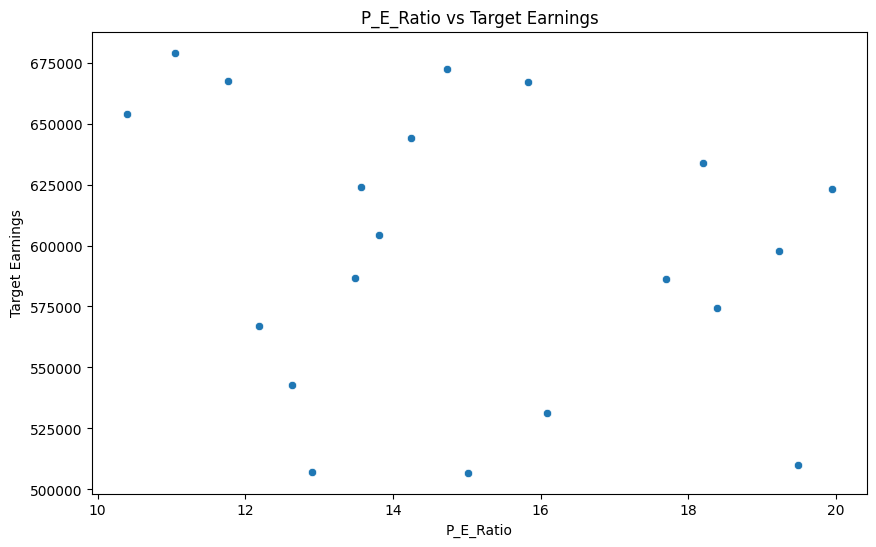

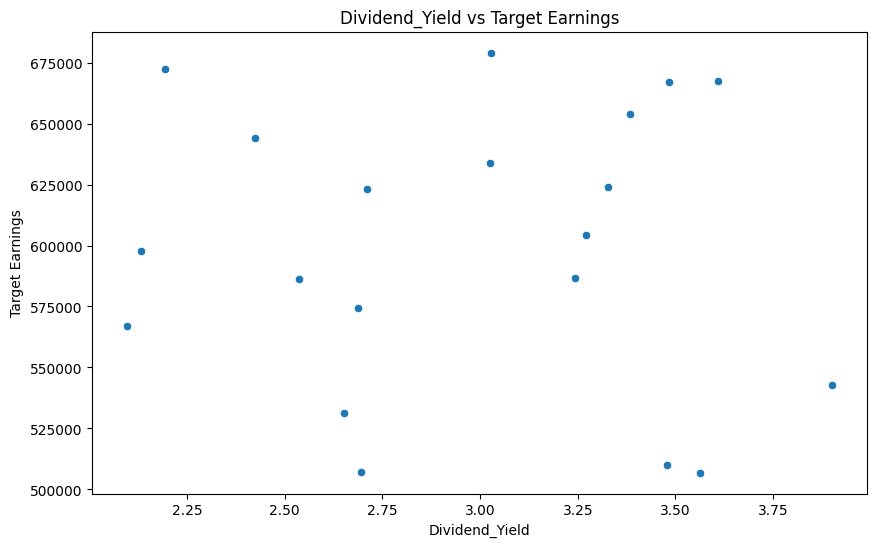

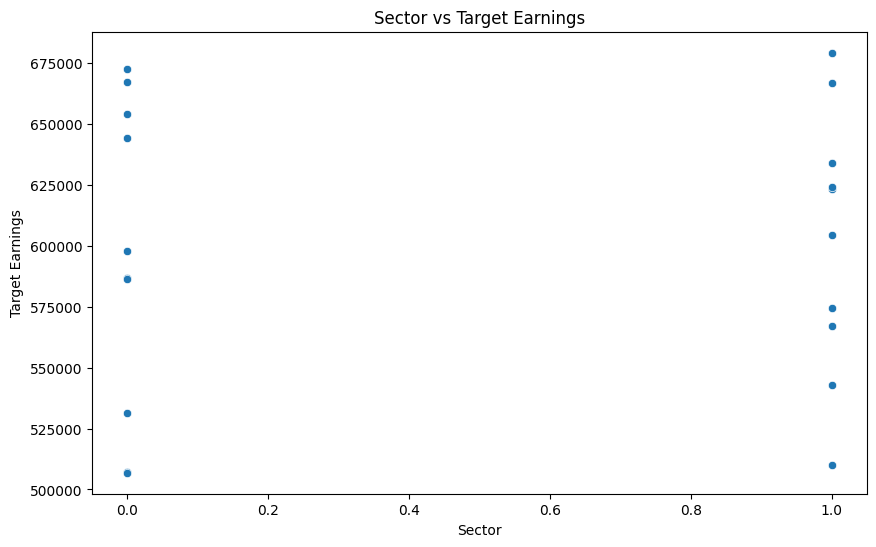

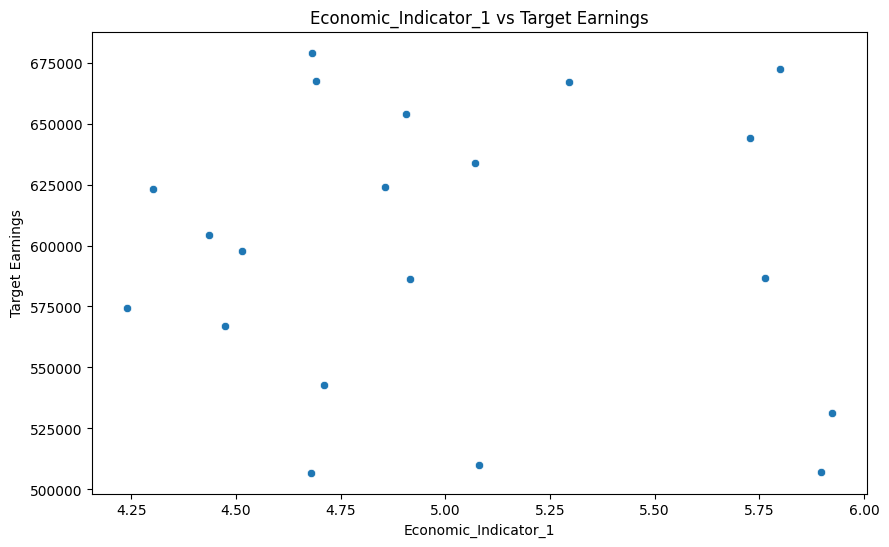

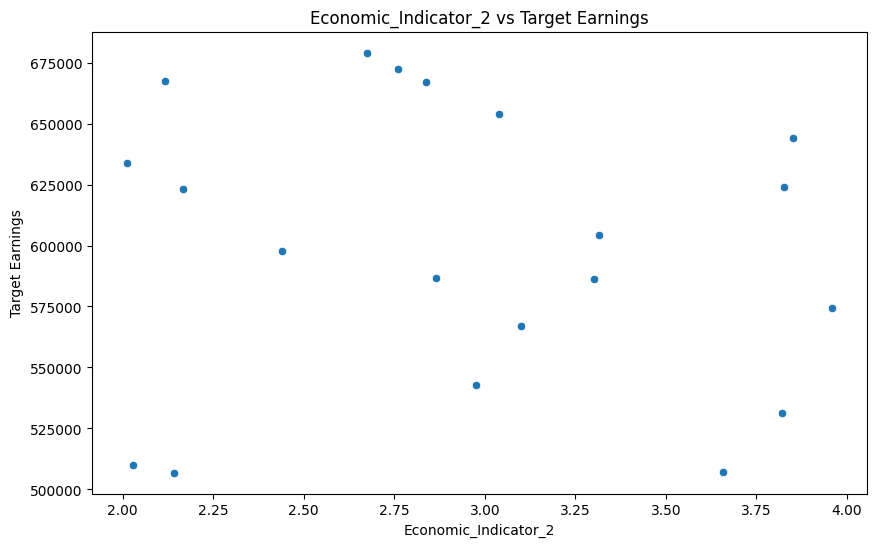

In [29]:
for column in numerical_features.columns:
    if column != 'Target_Earnings':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[column], y=df['Target_Earnings'])
        plt.title(f'{column} vs Target Earnings')
        plt.xlabel(column)
        plt.ylabel('Target Earnings')
        plt.show()


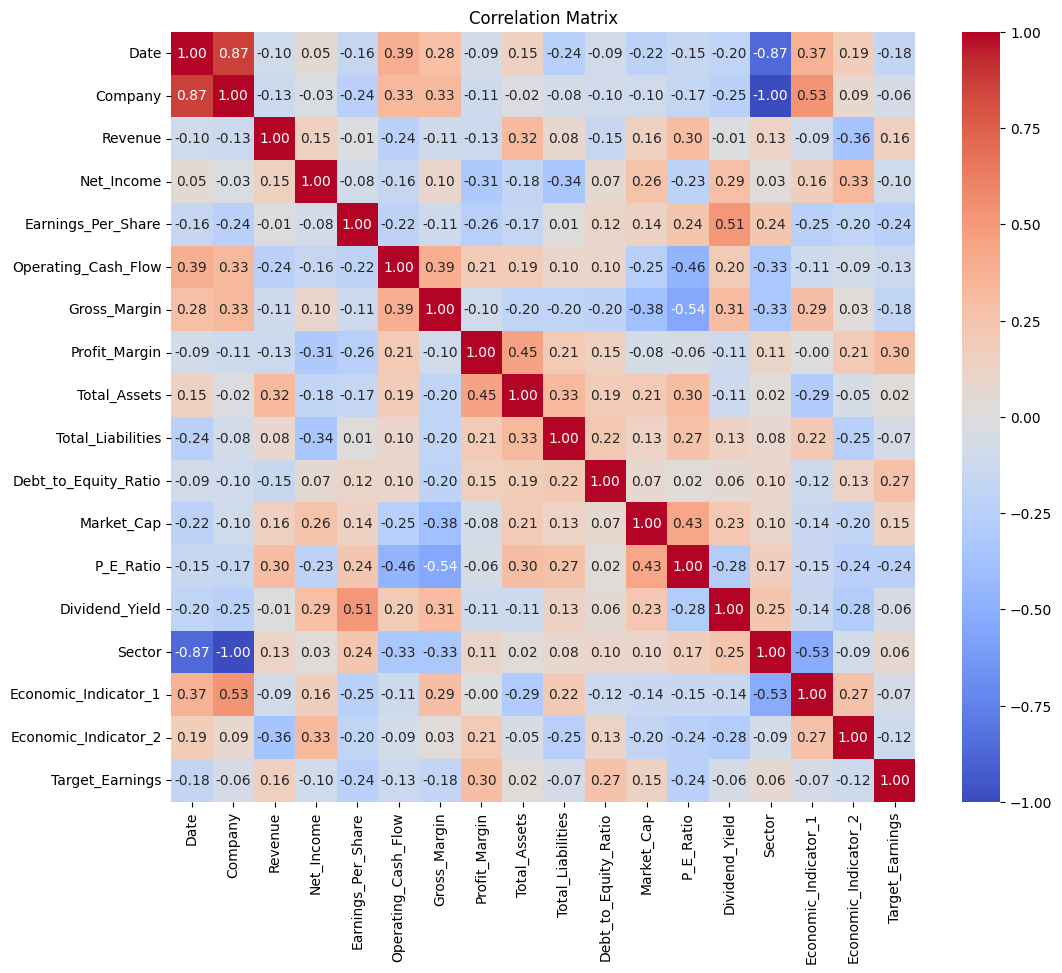

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
df['Company'] = label_encoder.fit_transform(df['Company'])
df['Sector'] = label_encoder.fit_transform(df['Sector'])


In [6]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(['Date', 'Target_Earnings'], axis=1))


In [7]:
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_features, df['Target_Earnings'].values, seq_length)


In [9]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (0,)
Shape of y: (0,)


In [10]:
seq_length = 5  # Example shorter sequence length
X, y = create_sequences(scaled_features, df['Target_Earnings'].values, seq_length)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (0,)
Shape of y: (0,)


In [11]:
print(f"Number of records: {len(df)}")


Number of records: 4


In [12]:
print(df.head())


                        Date  Company  Revenue  Net_Income  \
0 2024-07-24 05:21:36.845112        0  5000000      500000   
1 2024-06-24 05:21:36.845126        1  6000000      600000   
2 2024-05-25 05:21:36.845129        0  5200000      520000   
3 2024-04-25 05:21:36.845131        1  6200000      610000   

   Earnings_Per_Share  Operating_Cash_Flow  Gross_Margin  Profit_Margin  \
0                 2.5               700000            40             10   
1                 3.0               800000            45             12   
2                 2.6               720000            42             11   
3                 3.1               810000            46             13   

   Total_Assets  Total_Liabilities  Debt_to_Equity_Ratio  Market_Cap  \
0      15000000            5000000                  0.30    20000000   
1      16000000            6000000                  0.35    22000000   
2      15200000            5100000                  0.31    20500000   
3      16200000          

In [13]:
from sklearn.model_selection import train_test_split

# Ensure X and y have data
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
else:
    print("X or y is empty. Check sequence creation.")


X or y is empty. Check sequence creation.


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2024-01-01', periods=20, freq='D'),
    'Company': ['Company_A'] * 10 + ['Company_B'] * 10,
    'Revenue': np.random.randint(4000000, 7000000, 20),
    'Net_Income': np.random.randint(400000, 700000, 20),
    'Earnings_Per_Share': np.random.uniform(2.0, 4.0, 20),
    'Operating_Cash_Flow': np.random.randint(500000, 900000, 20),
    'Gross_Margin': np.random.uniform(30, 50, 20),
    'Profit_Margin': np.random.uniform(8, 15, 20),
    'Total_Assets': np.random.randint(14000000, 17000000, 20),
    'Total_Liabilities': np.random.randint(4000000, 7000000, 20),
    'Debt_to_Equity_Ratio': np.random.uniform(0.2, 0.4, 20),
    'Market_Cap': np.random.randint(18000000, 23000000, 20),
    'P_E_Ratio': np.random.uniform(10, 20, 20),
    'Dividend_Yield': np.random.uniform(2, 4, 20),
    'Sector': ['Technology'] * 10 + ['Healthcare'] * 10,
    'Economic_Indicator_1': np.random.uniform(4, 6, 20),
    'Economic_Indicator_2': np.random.uniform(2, 4, 20),
    'Target_Earnings': np.random.randint(500000, 700000, 20)
}

df = pd.DataFrame(data)

# Encode categorical data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Company'] = label_encoder.fit_transform(df['Company'])
df['Sector'] = label_encoder.fit_transform(df['Sector'])

# Normalize data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(['Date', 'Target_Earnings'], axis=1))

# Create sequences
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_features, df['Target_Earnings'].values, seq_length)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If data is still empty, recheck the above steps


Shape of X: (15, 5, 16)
Shape of y: (15,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [18]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 361613328384.0000 - val_loss: 338603704320.0000
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 361613295616.0000 - val_loss: 338603638784.0000
Epoch 3/50
1/1 [==============================] - 0s 52ms/step - loss: 361613262848.0000 - val_loss: 338603573248.0000
Epoch 4/50
1/1 [==============================] - 0s 54ms/step - loss: 361613164544.0000 - val_loss: 338603573248.0000
Epoch 5/50
1/1 [==============================] - 0s 48ms/step - loss: 361613131776.0000 - val_loss: 338603507712.0000
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 361613066240.0000 - val_loss: 338603409408.0000
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 361613000704.0000 - val_loss: 338603343872.0000
Epoch 8/50
1/1 [==============================] - 0s 39ms/step - loss: 361612967936.0000 - val_loss: 338603311104.0000
Epoch 9/50
1/1 [==============================] - 

In [20]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


1/1 [==============================] - 0s 26ms/step - loss: 338458083328.0000
Test Loss: 338458083328.0


In [21]:
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 205ms/step


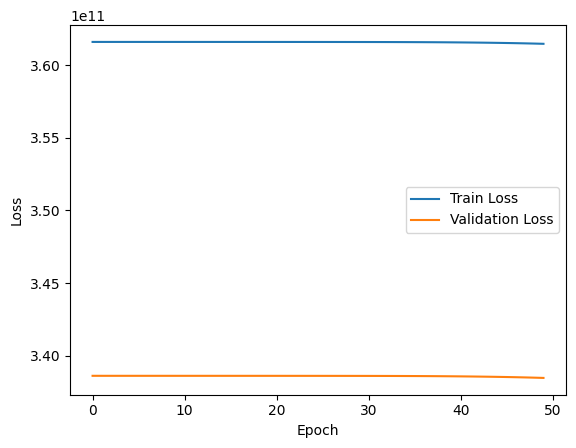

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
